<h1>Analytics on UN Population</h1>

# 1: India population over years - Bar Plot

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('population-estimates_csv.csv')
df.head()


,Region,Country Code,Year,Population
0,WORLD,900,1950,2536274.721
1,WORLD,900,1951,2583816.786
2,WORLD,900,1952,2630584.384
3,WORLD,900,1953,2677230.358
4,WORLD,900,1954,2724302.468


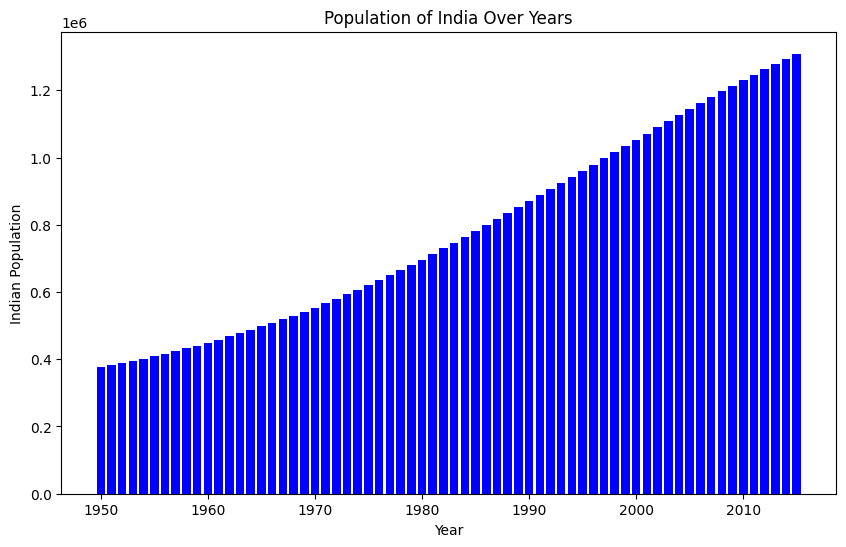

In [37]:
india_data = df[df['Country Code'] == 356]  # 356 == India Assumed

plt.figure(figsize=(10, 6))
plt.bar(india_data['Year'], india_data['Population'], color='blue')
plt.title('Population of India Over Years')
plt.xlabel('Year')
plt.ylabel('Indian Population')
plt.show()

# 2: For the year 2014. Bar Chart of population of ASEAN countries

In [38]:
asean_countries = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao People\'s Democratic Republic', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']
asean_data_2014 = df[(df['Region'].isin(asean_countries)) & (df['Year'] == 2014)].sort_values(by = 'Population')
asean_data_2014

,Region,Country Code,Year,Population
6928,Brunei Darussalam,96,2014,411.704
7390,Singapore,702,2014,5448.342
7126,Lao People's Democratic Republic,418,2014,6576.397
6994,Cambodia,116,2014,15270.790
7192,Malaysia,458,2014,30228.017
7258,Myanmar,104,2014,51924.182
7456,Thailand,764,2014,68416.772
7588,Viet Nam,704,2014,92544.915
7324,Philippines,608,2014,100102.249
7060,Indonesia,360,2014,255131.116


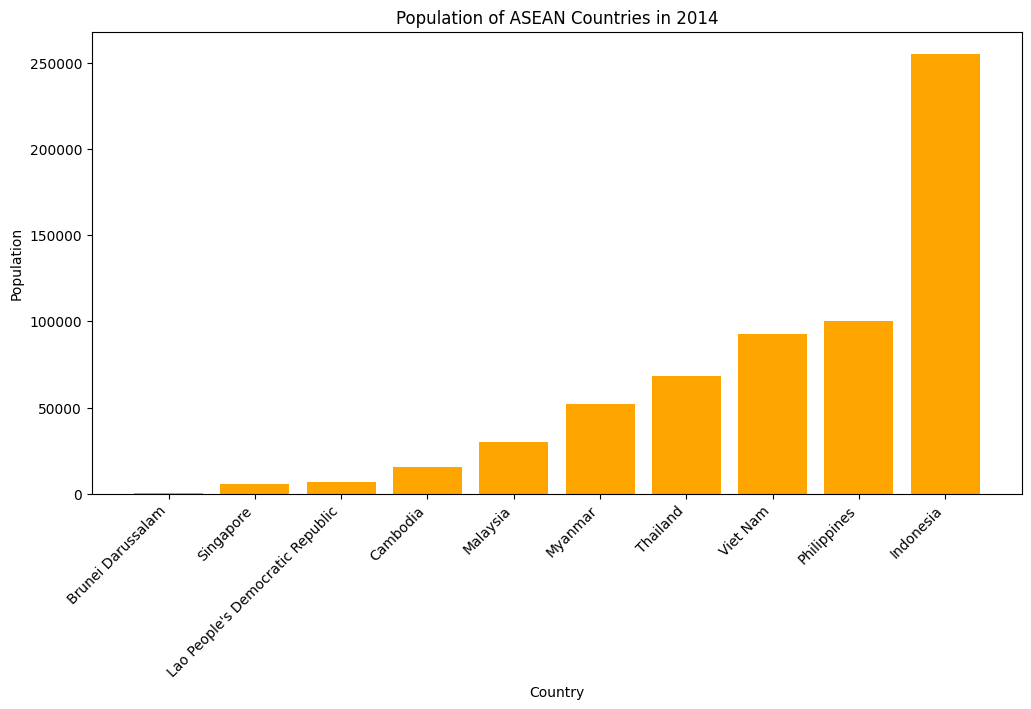

In [39]:
plt.figure(figsize=(12, 6))
plt.bar(asean_data_2014['Region'], asean_data_2014['Population'], color='orange')
plt.title('Population of ASEAN Countries in 2014')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45,ha = 'right')
plt.show()

# 3: Over the years, TOTAL population of SAARC countries

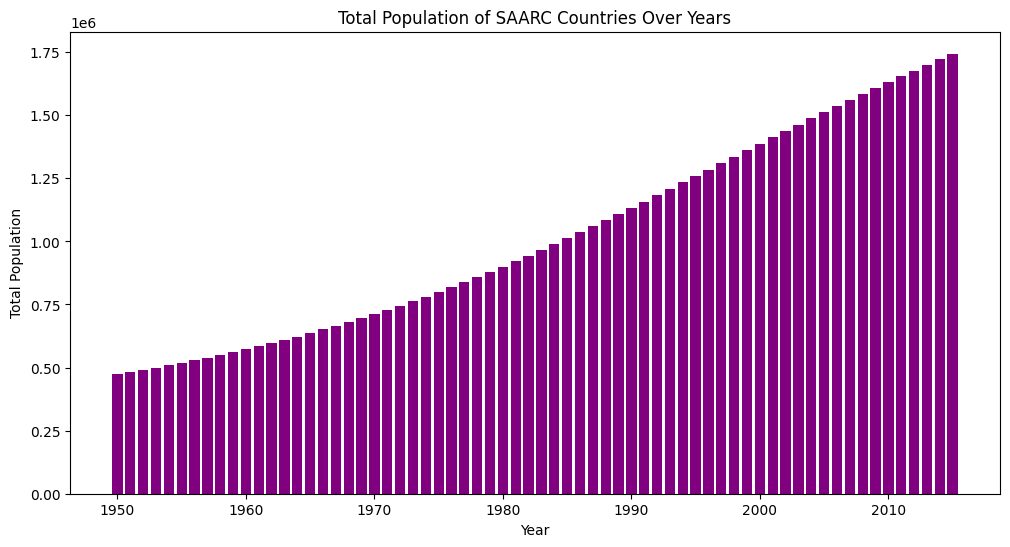

In [40]:
saarc_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
saarc_data = df[df['Region'].isin(saarc_countries)]
saarc_total_population = saarc_data.groupby('Year')['Population'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(saarc_total_population['Year'], saarc_total_population['Population'], color='purple')
plt.title('Total Population of SAARC Countries Over Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.show()

# 4: Grouped Bar Chart - ASEAN population vs. years

In [41]:
asean_data = df[(df['Region'].isin(asean_countries)) & (df['Year'] >= 2004) & (df['Year'] <= 2014)]
pivot_asean_data = asean_data.pivot_table(index='Year', columns='Region', values='Population', aggfunc='sum')
pivot_asean_data

Region,Brunei Darussalam,Cambodia,Indonesia,Lao People's Democratic Republic,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam
Year,,,,,,,,,,
2004,359.523,13063.377,223614.649,5664.605,25174.109,48073.707,84678.493,4370.040,65002.231,83527.678
2005,365.158,13270.201,226712.730,5754.026,25659.393,48482.614,86274.237,4491.042,65425.470,84308.843
2006,370.250,13474.489,229838.202,5849.356,26143.566,48846.474,87809.419,4611.901,65824.164,85094.617
2007,374.864,13676.693,232989.141,5949.787,26625.845,49171.586,89293.490,4732.528,66195.615,85889.590
2008,379.252,13880.509,236159.276,6052.190,27111.069,49479.752,90751.864,4851.109,66545.760,86707.801
2009,383.772,14090.208,239340.478,6152.036,27605.383,49800.690,92220.879,4965.518,66881.867,87565.407
2010,388.662,14308.740,242524.123,6246.274,28112.289,50155.896,93726.624,5074.252,67208.808,88472.512
2011,394.013,14537.886,245707.511,6333.487,28635.128,50553.031,95277.940,5176.017,67530.130,89436.644
2012,399.748,14776.866,248883.232,6415.169,29170.456,50986.514,96866.642,5270.958,67843.979,90451.881


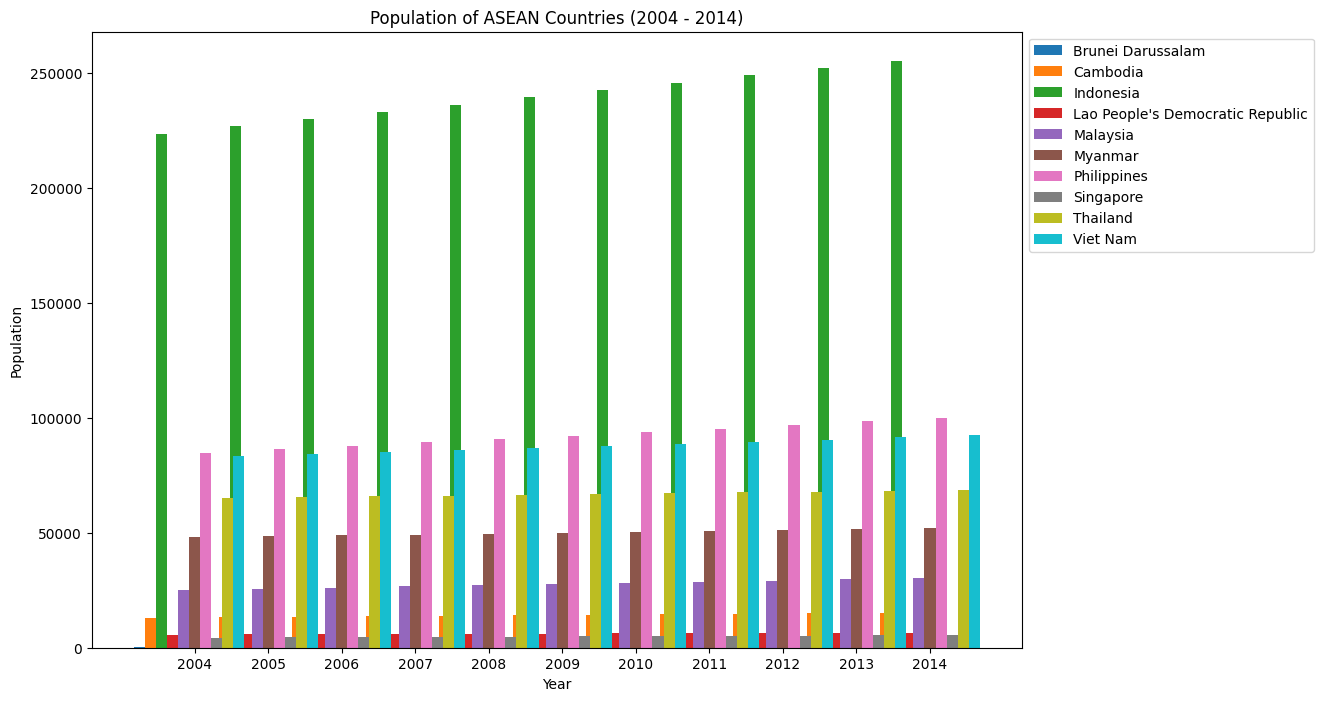

In [42]:
plt.figure(figsize=(12, 8))
bar_width = 0.15
bar_positions = np.arange(len(pivot_asean_data.index))

for i, country in enumerate(asean_countries):
    plt.bar(bar_positions + i * bar_width, pivot_asean_data[country], width=bar_width, label=country)

plt.title('Population of ASEAN Countries (2004 - 2014)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(bar_positions + (len(asean_countries) / 2) * bar_width, pivot_asean_data.index)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()